<a href="https://colab.research.google.com/github/jad3g/Optimization_of_Bank_Customer_Churn_Prediction/blob/bank-project/Optimization_of_Bank_Customer_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
customer_churn = pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
customer_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
customer_churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [ ]:
!git status



fatal: not a git repository (or any of the parent directories): .git


In [ ]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
customer_churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
customer_churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
customer_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
customer_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
customer_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
corr_matrix = customer_churn.corr()
corr_matrix

<ipython-input-12-941afb3df69a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = customer_churn.corr()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.026771,-0.027048,-0.012599,0.000077
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285296,0.283530,-0.000876,0.002222
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013656,-0.013047,0.008663,-0.010196
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118577,0.119124,-0.002588,0.014608
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047611,-0.046357,-0.011394,-0.015330
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.006976,-0.007095,-0.000212,-0.011041
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156356,-0.154741,0.010236,-0.004983
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012490,0.012494,-0.013747,-0.001515
Exited,-0.026771,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,1.000000,0.995693,-0.005849,-0.004628
Complain,-0.027048,0.283530,-0.013047,0.119124,-0.046357,-0.007095,-0.154741,0.012494,0.995693,1.000000,-0.004799,-0.002893


<ipython-input-13-054b29db48d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = customer_churn.corr(method='pearson')


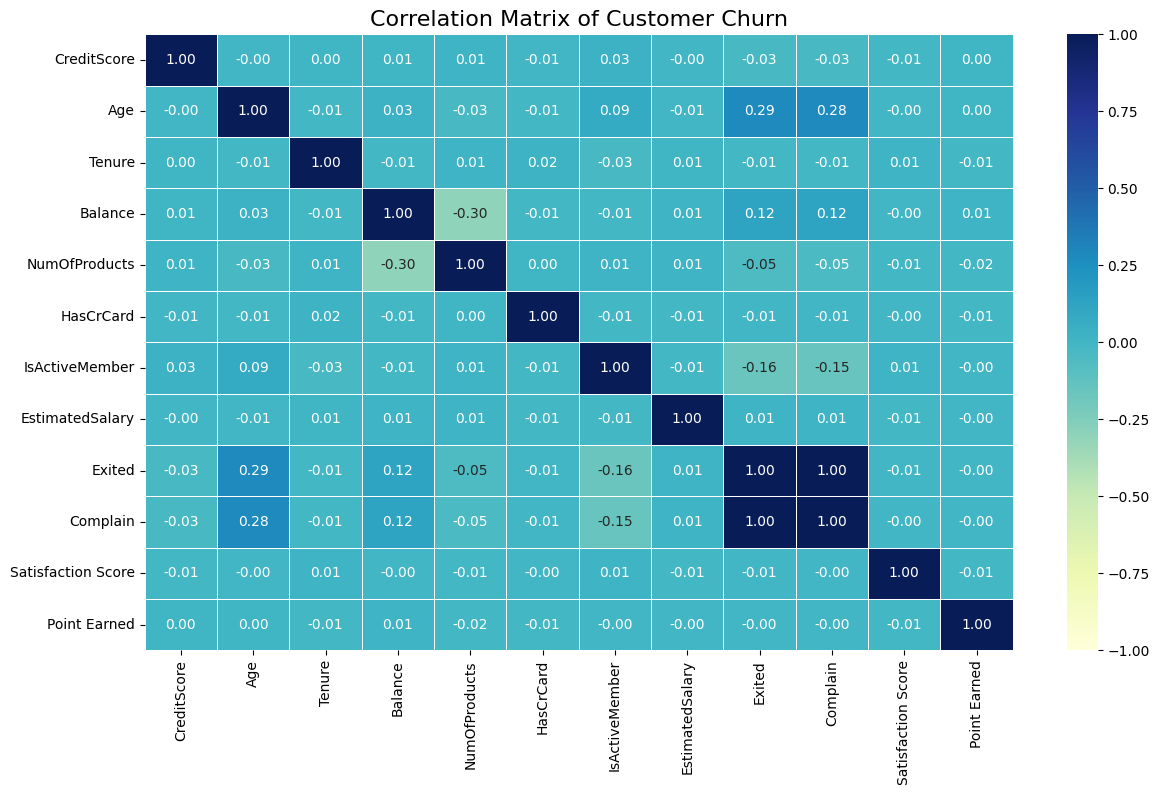

In [ ]:
corr_matrix = customer_churn.corr(method='pearson')
plt.subplots(figsize=(14,8))
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            annot=True, linewidths=0.5, vmin=-1, vmax=1, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix of Customer Churn', fontsize = 16)
plt.show()

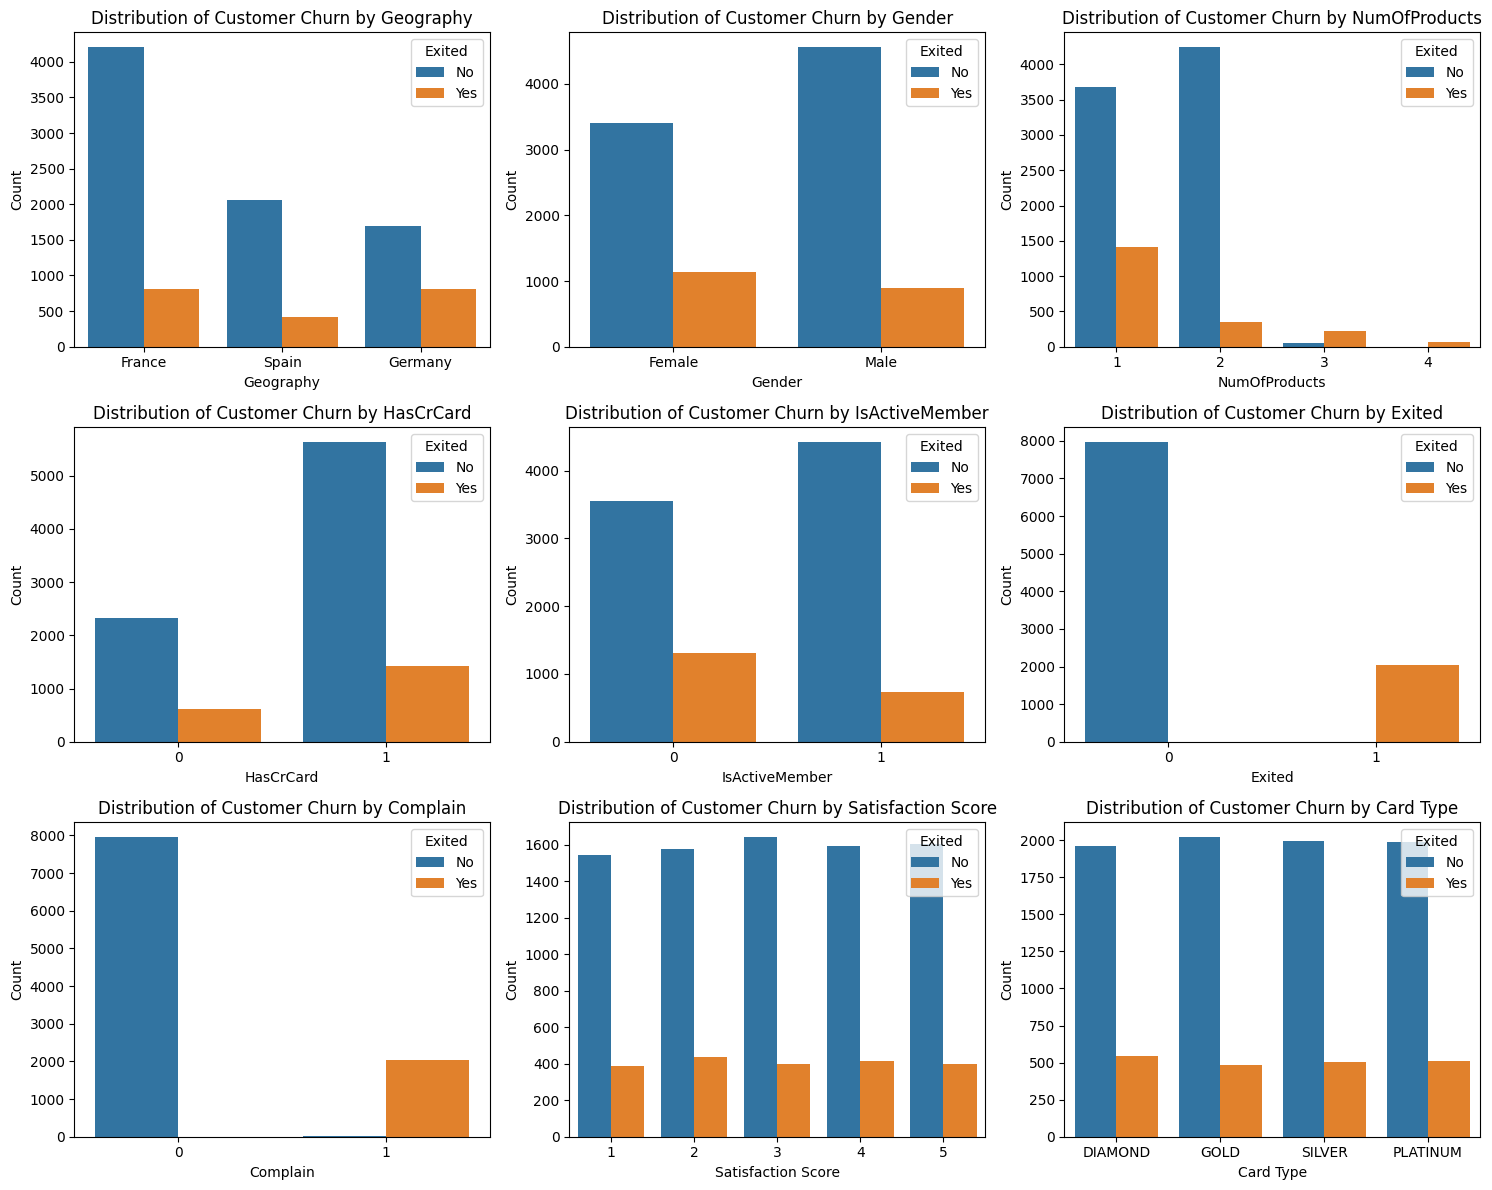

In [ ]:
# Columns to exclude
exclude_columns = ['Tenure', 'EstimatedSalary', 'Balance', 'Age', 'CreditScore', 'Point Earned']

# Select relevant predictors
predictors = [col for col in customer_churn.columns if col not in exclude_columns]

# Set up subplots
num_cols = 3
num_rows = (len(predictors) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Flatten the axes array if needed
axes = axes.flatten()

# Loop over predictors
for i, predictor in enumerate(predictors):
    ax = axes[i]
    sns.countplot(data=customer_churn, x=predictor, hue='Exited', ax=ax)
    ax.set_xlabel(predictor)
    ax.set_ylabel('Count')
    ax.legend(title='Exited', labels=['No', 'Yes'])
    ax.set_title(f'Distribution of Customer Churn by {predictor}')

# Remove empty subplots
for j in range(len(predictors), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
columns_to_encode = ['Geography', 'Gender', 'Card Type']
for column in columns_to_encode:
  customer_churn[column] = enc.fit_transform(customer_churn[column])

In [ ]:
customer_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [ ]:
customer_churn['Exited'].value_counts(normalize=True) * 100

0    79.62
1    20.38
Name: Exited, dtype: float64

<Axes: >

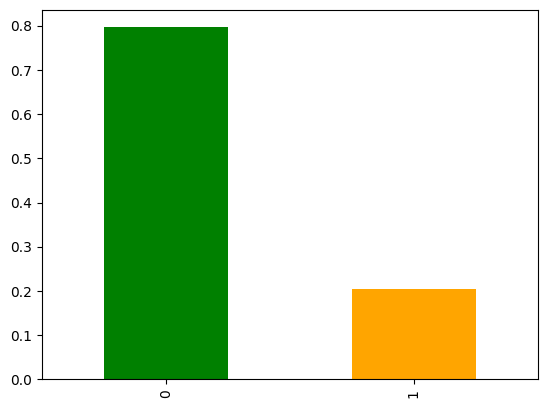

In [ ]:
customer_churn['Exited'].value_counts(normalize=True).plot(kind='bar', color=['green','orange'])

In [ ]:
# splitting the data into X and y
X = customer_churn.drop('Exited', axis=1)
y = customer_churn['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,608,2,0,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,5,1,350
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_min = scaler.fit_transform(X)
X_min_df = pd.DataFrame(X_min, columns = X.columns)

In [ ]:
X_min_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.972908,-0.721130,-1.339533,-0.630839
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,1.972908,-0.009816,-1.339533,-0.666251
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.972908,-0.009816,-1.339533,-1.015942
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.506866,1.412812,-0.445319,-1.135457
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.506866,1.412812,-0.445319,-0.803472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.506866,-1.432445,-1.339533,-1.356781
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.506866,1.412812,0.448895,0.728088
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.972908,-0.009816,1.343109,-0.188192
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.972908,-0.721130,-0.445319,-1.184148


In [ ]:
# balancing the features using RandomUnderSampling Technique
#rus = RandomUnderSampler(sampling_strategy='auto')
#X_res, y_res = rus.fit_resample(X, y)

In [ ]:
#X_res.head()

In [ ]:
#y_res.head()

In [ ]:
# adding count labels on top of the bars
#def add_count_labels(ax):
 #   for p in ax.patches:
  #      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
   #                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
    #                textcoords='offset points')

# Plot the value counts with a bar graph before SMOTE_Tomek
#plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
#ax1 = pd.Series(y).value_counts().plot(kind="bar", color=["green", "orange"])
#plt.xlabel("Class")
#plt.ylabel("Count")
#plt.title("Before balancing")
#add_count_labels(ax1)

# Plot the value counts with a bar graph after SMOTE_Tomek
#plt.subplot(1, 2, 2)
#ax2 = pd.Series(y_res).value_counts().plot(kind="bar", color=["green", "orange"])
#plt.xlabel("Class")
#plt.ylabel("Count")
#plt.title("After balancing")
#add_count_labels(ax2)

#plt.tight_layout()
#plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import matthews_corrcoef


In [ ]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_min_df, y, test_size=0.2, random_state=42)

In [ ]:
X_train, len(X_train)

(      CreditScore  Geography    Gender       Age    Tenure   Balance  \
 9254     0.367013  -0.901886  0.912419 -0.660018  0.341352 -1.225848   
 1561    -0.191713   0.306591  0.912419  0.293517 -0.350204  0.691389   
 1670    -0.947028   1.515067  0.912419 -1.422847 -0.695982  0.613102   
 6087    -0.926334  -0.901886 -1.095988 -1.136786  1.378686  0.948021   
 6669    -1.381593  -0.901886  0.912419  1.628468  1.378686  1.052363   
 ...           ...        ...       ...       ...       ...       ...   
 5734     1.215448  -0.901886  0.912419  1.437761  1.032908 -0.108554   
 5191     0.325625  -0.901886 -1.095988  1.819175 -1.387538 -1.225848   
 5390     0.874005  -0.901886 -1.095988 -0.087897 -1.387538 -1.225848   
 860      0.170424  -0.901886  0.912419  0.388871  1.032908  1.822949   
 7270     0.480827   0.306591  0.912419  1.151700 -1.387538  1.144727   
 
       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Complain  \
 9254       0.807737   0.646092        0.970

In [ ]:
y_train, len(y_train)

(9254    0
 1561    0
 1670    1
 6087    1
 6669    1
        ..
 5734    0
 5191    0
 5390    1
 860     1
 7270    0
 Name: Exited, Length: 8000, dtype: int64,
 8000)

In [ ]:
#Using PCA for feature selection analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import matthews_corrcoef
import numpy as np

models = {
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=100),
    "Random Forest": RandomForestClassifier(max_depth=2, n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=0, max_depth=2),
    "Gaussian NB": GaussianNB(),
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mr_coeff = matthews_corrcoef(y_test, y_pred)
        model_scores[name] = mr_coeff
        print(f"{name} mr_coeff: {mr_coeff:.2f}")

    return model_scores

# Assuming X_train, X_test, y_train, y_test are defined
models_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print("Model Scores:\n", models_scores)


Logistic Regression mr_coeff: 0.91
Random Forest mr_coeff: 0.76
KNN mr_coeff: 0.88
Decision Tree mr_coeff: 0.78
Gaussian NB mr_coeff: 0.88
Model Scores:
 {'Logistic Regression': 0.9072586707087817, 'Random Forest': 0.7602677003196635, 'KNN': 0.879170095948752, 'Decision Tree': 0.7830883530689806, 'Gaussian NB': 0.8805020359841174}


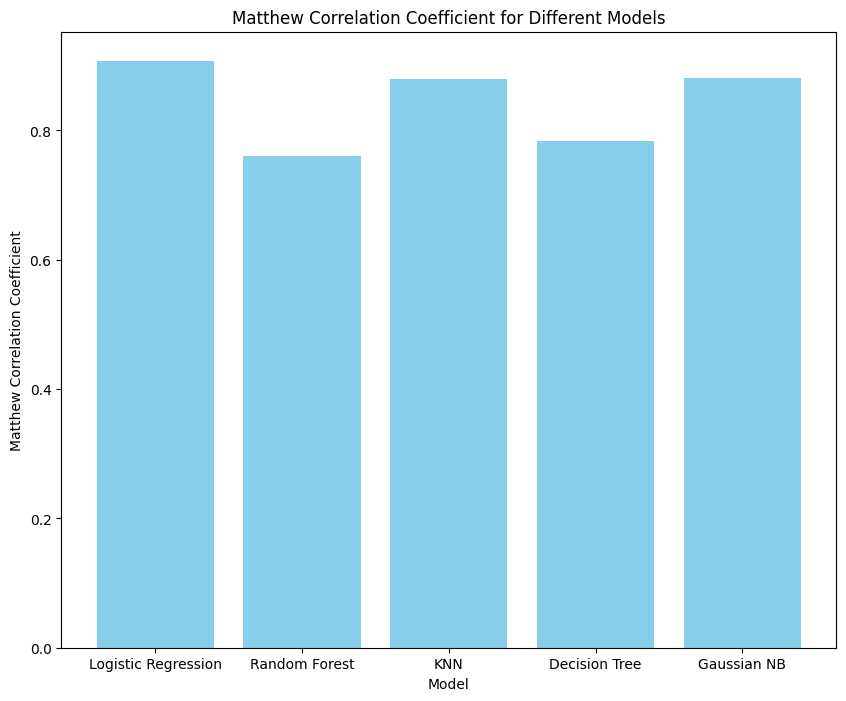

In [ ]:
model_names = list(models_scores.keys())
mcc_values = list(models_scores.values())

plt.figure(figsize=(10,8))
plt.bar(model_names,mcc_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Matthew Correlation Coefficient')
plt.title('Matthew Correlation Coefficient for Different Models')
plt.show()

In [ ]:
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform
import numpy as np

# Define the custom scorer for MCC
scorer_mcc = make_scorer(matthews_corrcoef)

models = {
    "Logistic Regression": LogisticRegression(random_state=0, max_iter=100),
    "Random Forest": RandomForestClassifier(random_state=0),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "Gaussian NB": GaussianNB(),
}

def optimize_hyperparameters(model, param_dist, X_train, y_train):
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=10,
        cv=5,
        scoring=scorer_mcc,
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    return best_model, random_search.best_params_

# Hyperparameter spaces for different models
param_dist_lr = {
    'C': uniform(0.1, 10.0),
    'penalty': ['l1', 'l2']
}

param_dist_knn = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

param_dist_dt = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

param_dist_rf = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'min_weight_fraction_leaf': uniform(0, 0.5)
}

param_dist_nb = {}

best_models = {}
best_params = {}

for name, model in models.items():
    if name == "Logistic Regression":
        best_model, best_param = optimize_hyperparameters(model, param_dist_lr, X_train, y_train)
    elif name == "KNN":
        best_model, best_param = optimize_hyperparameters(model, param_dist_knn, X_train, y_train)
    elif name == "Decision Tree":
        best_model, best_param = optimize_hyperparameters(model, param_dist_dt, X_train, y_train)
    elif name == "Random Forest":
        best_model, best_param = optimize_hyperparameters(model, param_dist_rf, X_train, y_train)
    elif name == "Gaussian NB":
        best_model, best_param = optimize_hyperparameters(model, param_dist_nb, X_train, y_train)

    best_models[name] = best_model
    best_params[name] = best_param

# Evaluate the best models on the test set
model_scores = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mr_coeff = matthews_corrcoef(y_test, y_pred)
    model_scores[name] = mr_coeff
    print(f"{name} MCC: {mr_coeff:.2f}, Best Hyperparameters: {best_params[name]}")

print("\nBest Models:\n", best_models)
print("Model Scores:\n", model_scores)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Logistic Regression MCC: 0.91, Best Hyperparameters: {'C': 7.180725777960454, 'penalty': 'l2'}
Random Forest MCC: 0.91, Best Hyperparameters: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.006632480579933264, 'n_estimators': 98}
KNN MCC: 0.90, Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
Decision Tree MCC: 0.89, Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 10}
Gaussian NB MCC: 0.88, Best Hyperparameters: {}

Best Models:
 {'Logistic Regression': LogisticRegression(C=7.180725777960454, random_state=0), 'Random Forest': RandomForestClassifier(max_depth=19, max_features='log2', min_samples_leaf=9,
                       min_samples_split=8,
                       min_weight_fraction_leaf=0.006632480579933264,
                       n_estimators=98, random_state=0), 'KN